In [1]:
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn. preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

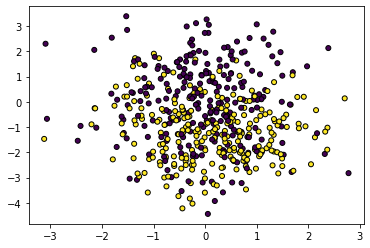

In [2]:
X, y = make_classification(n_samples=500, n_features=10, n_redundant=2, n_informative=4, n_clusters_per_class=2, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
class Navie:
    
    def __init__(self,X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.k = len(set(self.y_train))
    
    def mean_std(self):
        n = self.X_train.shape[1]
        self.mean = np.zeros((self.k, n))
        self.std = np.zeros((self.k, n))
        m = {}
        sum_m = 0
        for label in range(self.k):
            self.mean[label, :] = self.X_train[self.y_train==label].mean(axis=0)
            self.std[label, :] = self.X_train[self.y_train==label].std(axis=0)
            m[label] = len(self.X_train[self.y_train == label])
            sum_m += m[label]
        
        self.prior = {}
        for label in range(self.k):
            self.prior[label] = m[label] / sum_m
            
        return self.mean, self.std
    
    def gaussian_pdf(self,X, mean,std):
        left = 1 / (np.sqrt(2 * np.pi) * std)
        e = (X - mean) ** 2 / ( 2 * (std ** 2))
        right = np.exp(-e)
        self.pdf = left * right
        return self.pdf
    
    def fit(self,X_test, y_test):
        mean, std = self.mean_std()
        likelihood = {}
        total_likelihood = {}
        self.posterior = np.zeros((X_test.shape[0], self.k))
        for label in range(self.k):
            likelihood[label] = self.gaussian_pdf(X_test, mean[label, :], std[label, :])
            total_likelihood[label] = np.prod(likelihood[label], axis=1)
            self.posterior[:,label] = self.prior[label] * total_likelihood[label]
        return self.posterior
    
    def accuracy(self):
        yhat = np.argmax(self.posterior, axis =1)
        return yhat

In [6]:
model = Navie(X_train, y_train)

In [7]:
model.fit(X_test, y_test)
yhat = model.accuracy()
print(yhat)
print(yhat.shape)

[1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1
 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0
 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1
 0 1]
(150,)


In [8]:
from sklearn.metrics import average_precision_score, classification_report
print(average_precision_score(y_test, yhat))

0.8106740196078431


In [9]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        70
           1       0.90      0.76      0.82        80

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.84      0.83      0.83       150



## 3 classes

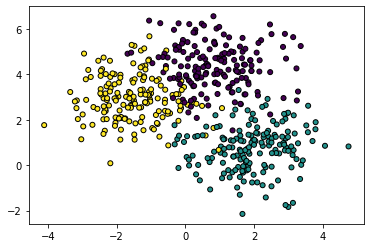

In [10]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
model = Navie(X_train, y_train)
model.fit(X_test, y_test)
yhat = model.accuracy()
print(yhat)
print(yhat.shape)

[0 1 2 0 2 2 2 2 1 2 1 1 1 2 2 0 1 0 2 0 0 2 1 0 2 0 2 0 1 0 0 0 0 1 2 2 0
 1 2 0 0 0 2 2 1 1 1 1 0 2 2 0 2 1 0 0 1 1 2 1 0 2 2 0 1 2 1 0 1 2 0 1 1 1
 2 1 0 0 2 0 2 1 0 2 2 1 2 1 1 1 0 1 2 2 1 1 1 1 1 1 1 0 1 2 2 0 0 0 1 0 2
 0 0 0 1 2 0 2 2 2 2 2 2 2 0 2 2 1 1 1 2 2 1 2 2 1 1 0 1 1 0 2 1 1 0 1 2 0
 2 2]
(150,)


In [12]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score

In [13]:
print("=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
yhat_binarized   = label_binarize(yhat, classes=[0, 1, 2])

n_classes = len(np.unique(y_test))

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
    print(f"Class {i} score: ", class_score)

=========Average precision score=======
Class 0 score:  0.7981488801054017
Class 1 score:  0.9462820512820512
Class 2 score:  0.8381481481481481
